In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Importing the training set
df = pd.read_pickle('data_spread.pkl')
total_data=df.iloc[:, 1:2].values
train_data = total_data[:600]
test_data =  total_data[600:]

In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_data)

In [13]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 600):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [38]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
540/540 [==============================] - 7s 14ms/step - loss: 0.0080
Epoch 2/100
540/540 [==============================] - 3s 5ms/step - loss: 0.0074
Epoch 3/100
540/540 [==============================] - 3s 5ms/step - loss: 0.0073
Epoch 4/100
540/540 [==============================] - 3s 5ms/step - loss: 0.0072
Epoch 5/100
540/540 [==============================] - 3s 5ms/step - loss: 0.0071
Epoch 6/100
540/540 [==============================] - 3s 5ms/step - loss: 0.0071
Epoch 7/100
540/540 [==============================] - 3s 5ms/step - loss: 0.0071
Epoch 8/100
540/540 [==============================] - 3s 6ms/step - loss: 0.0068
Epoch 9/100
540/540 [==============================] - 4s 7ms/step - loss: 0.0064
Epoch 10/100
540/540 [==============================] - 4s 7ms/step - loss: 0.0067
Epoch 11/100
540/540 [==============================] - 4s 7ms/step - loss: 0.0063
Epoch 12/100
540/540 [==============================] - 4s 7ms/step - loss: 0.0064
Epoch 13/100

540/540 [==============================] - 3s 5ms/step - loss: 0.0049
Epoch 100/100
540/540 [==============================] - 3s 6ms/step - loss: 0.0047


In [39]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
inputs = total_data[len(total_data) - len(test_data) - 60:]
inputs = inputs.reshape(-1,1)
inputs.shape

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 222):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_node_price = regressor.predict(X_test)
predicted_node_price = sc.inverse_transform(predicted_node_price)

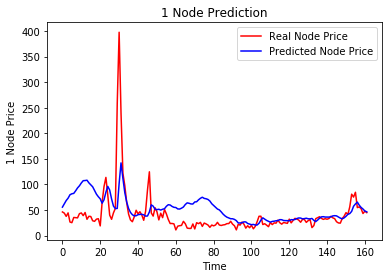

In [42]:
# Visualising the results
plt.plot(test_data, color = 'red', label = 'Real Node Price')
plt.plot(predicted_node_price, color = 'blue', label = 'Predicted Node Price')
plt.title('1 Node Prediction')
plt.xlabel('Time')
plt.ylabel('1 Node Price')
plt.legend()
plt.show()